# Lineare Regression 

Lineare Regression ist ein statistisches Verfahren zur Beschreibung der Beziehung zwischen einer abhängigen Variable (y) und einer oder mehreren unabhängigen Variablen (X). Sie zielt darauf ab, eine lineare Beziehung zwischen den Variablen zu modellieren, indem sie eine mathematische Funktion verwendet, die die unabhängigen Variablen auf die abhängige Variable abbildet. Das Ziel ist es, eine Hyperebene zu finden, die die Trainingsdaten am besten beschreibt und in der Lage ist, einen kontinuierlichen Wert für neue Instanzen vorherzusagen. Je näher die die Hyperebene an den Instanzen liegt, desto besser ist das Modell. Das Ziel der Linearen Regression besteht darin, die Koeffizienten so anzupassen, dass sie die Residuen minimiert, das heißt, die Differenz zwischen den beobachteten Werten und den vorhergesagten Werten der abhängigen Variable. (Bishop and Nasrabadi, 2006)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from math import sqrt

In [2]:
lexica_corpus = pd.read_csv("text_complexity_lexica_corpus.csv").drop(["Unnamed: 0"],  axis='columns')
lexica_corpus_df = lexica_corpus.drop(["#id"],  axis='columns')
#df.to_csv("text_complexity_lexica_corpus.csv")


## Baseline Textkomplexitätsmerkmale

In [3]:
baseline_df = lexica_corpus_df[["#label", "sentence_length", "characters_per_word", "syllables_per_word", "text_length"]]
baseline_df.head()

,#label,sentence_length,characters_per_word,syllables_per_word,text_length
0,0.0,7.285714,4.862745,1.627451,102
1,0.0,8.090909,4.494382,1.539326,89
2,0.0,7.187500,4.521739,1.634783,115
3,0.0,7.200000,5.000000,1.743056,144
4,0.0,6.235294,5.132075,1.877358,106


### Train und Test Daten

In [4]:
y_baseline = baseline_df["#label"]
X_baseline = baseline_df.drop(["#label"],  axis='columns')

X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, test_size=0.2, random_state=123)

print("X_train_baseline shape: ", X_train_baseline.shape)
print("X_test_baseline shape: ", X_test_baseline.shape)
print("y_train_baseline shape: ", y_train_baseline.shape)
print("y_test_baseline shape: ", y_test_baseline.shape)

X_train_baseline shape:  (708, 4)
X_test_baseline shape:  (177, 4)
y_train_baseline shape:  (708,)
y_test_baseline shape:  (177,)


### Standardisierung
Standardisierung zur Normalisierung der Daten, indem die Daten so skaliert werden, dass sie einen Mittelwert von Null und eine Standardabweichung von Eins haben. Dies verhindert, dass Datenpunkte, die eine viel größere Skala haben als andere, das Modell dominieren.

In [5]:
scaler_bl = StandardScaler()
train_scaled_baseline = scaler_bl.fit_transform(X_train_baseline)
test_scaled_baseline = scaler_bl.transform(X_test_baseline)

### Lineare Regression

In [6]:
model_bl = LinearRegression()
model_bl.fit(train_scaled_baseline, y_train_baseline)

LinearRegression()

### Model Evaluation

In [7]:
mse_baseline = mean_squared_error(y_train_baseline, model_bl.predict(train_scaled_baseline))
mae_baseline = mean_absolute_error(y_train_baseline, model_bl.predict(train_scaled_baseline))
print("mse_baseline = ",mse_baseline," & mae_baseline = ",mae_baseline," & rmse_baseline = ", sqrt(mse_baseline))

mse_baseline =  0.03685208023090866  & mae_baseline =  0.14821594137849964  & rmse_baseline =  0.19196895642501333


In [8]:
test_mse_baseline = mean_squared_error(y_test_baseline, model_bl.predict(test_scaled_baseline))
test_mae_baseline = mean_absolute_error(y_test_baseline, model_bl.predict(test_scaled_baseline))
print("mse_baseline = ",test_mse_baseline," & mae_baseline = ",test_mae_baseline," & rmse_baseline = ", sqrt(test_mse_baseline))

mse_baseline =  0.038843457378416706  & mae_baseline =  0.1543669159060447  & rmse_baseline =  0.1970874358715357


In [9]:
scores_bl = cross_val_score(model_bl, X_baseline, y_baseline, cv=5, scoring='neg_mean_squared_error')

# durchschnittliche mittlere quadratische Abweichung
mse_mean_bl = -scores_bl.mean()
print("Mean squared error:", mse_mean_bl)

Mean squared error: 0.05364619107960049


## Alle Textkomplexitätsmerkmale 

### Train und Test Daten

In [10]:
y = lexica_corpus_df["#label"]
X = lexica_corpus_df.drop(["#label"],  axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (708, 53)
X_test shape:  (177, 53)
y_train shape:  (708,)
y_test shape:  (177,)


### Standardisierung
Standardisierung zur Normalisierung der Daten, indem die Daten so skaliert werden, dass sie einen Mittelwert von Null und eine Standardabweichung von Eins haben. Dies verhindert, dass Datenpunkte, die eine viel größere Skala haben als andere, das Modell dominieren.

In [11]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

### Lineare Regression

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

- Der mittlere quadratische Fehler (mse) ist ein Maß für die durchschnittliche Abweichung zwischen den Vorhersagen und den tatsächlichen Werten und wird verwendet, um die Leistung von Regressionsmodellen zu bewerten. Je kleiner der mittlere quadratische Fehler, desto besser ist die Leistung des Modells.
- Der mittlere absolute Fehler (mae) ist ein weiteres Maß für die durchschnittliche Abweichung zwischen den Vorhersagen und den tatsächlichen Werten. Im Vergleich zum mittleren quadratischen Fehler ist er weniger empfindlich gegenüber Ausreißern in den Daten.

In [13]:
mse = mean_squared_error(y_train, model.predict(X_train))
mae = mean_absolute_error(y_train, model.predict(X_train))
print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))

mse =  0.021005751180014312  & mae =  0.11324751945133679  & rmse =  0.14493360955973708


In [14]:
test_mse = mean_squared_error(y_test, model.predict(X_test))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

mse =  0.025746639609367614  & mae =  0.12163565469434168  & rmse =  0.16045759442721186


- 5-Fold-Validierung ist ein Verfahren, bei dem die verfügbaren Daten in fünf zufällige Untergruppen unterteilt werden. Das Modell wird dann fünfmal trainiert und getestet, wobei jeweils eine der fünf Untergruppen als Testdatensatz und die anderen vier als Trainingsdatensätze verwendet werden. Das Ergebnis der Validierung ist der Durchschnitt der Leistung des Modells auf den fünf Testdatensätzen.

In [15]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# durchschnittliche mittlere quadratische Abweichung
mse_mean = -scores.mean()
print("Mean squared error:", mse_mean)

Mean squared error: 0.034179321268390433


### Merkmalswichtigkeit für das Modell

Die Feature Importance (Merkmalswichtigkeit) zeigt, welche Merkmale (Features) die größte Vorhersagekraft für das Modell haben. Bei linearen Modellen können die Koeffizienten - also Gewichte - wiedergeben, wie wichtig das jeweilige Merkmal ist, um eine Vorhersage zu treffen, die möglichst einen kleinen Abstand zum eigentlich gesuchten Wert hat. (siehe Feature Importance in https://christophm.github.io/interpretable-ml-book/limo.html )

In [16]:
importances = model.coef_
features = lexica_corpus_df.drop(["#label"],  axis='columns').columns
feat_importances = pd.Series(importances, index=features)
feat_importances = feat_importances.sort_values()

<AxesSubplot:title={'center':'Feature Importances'}>

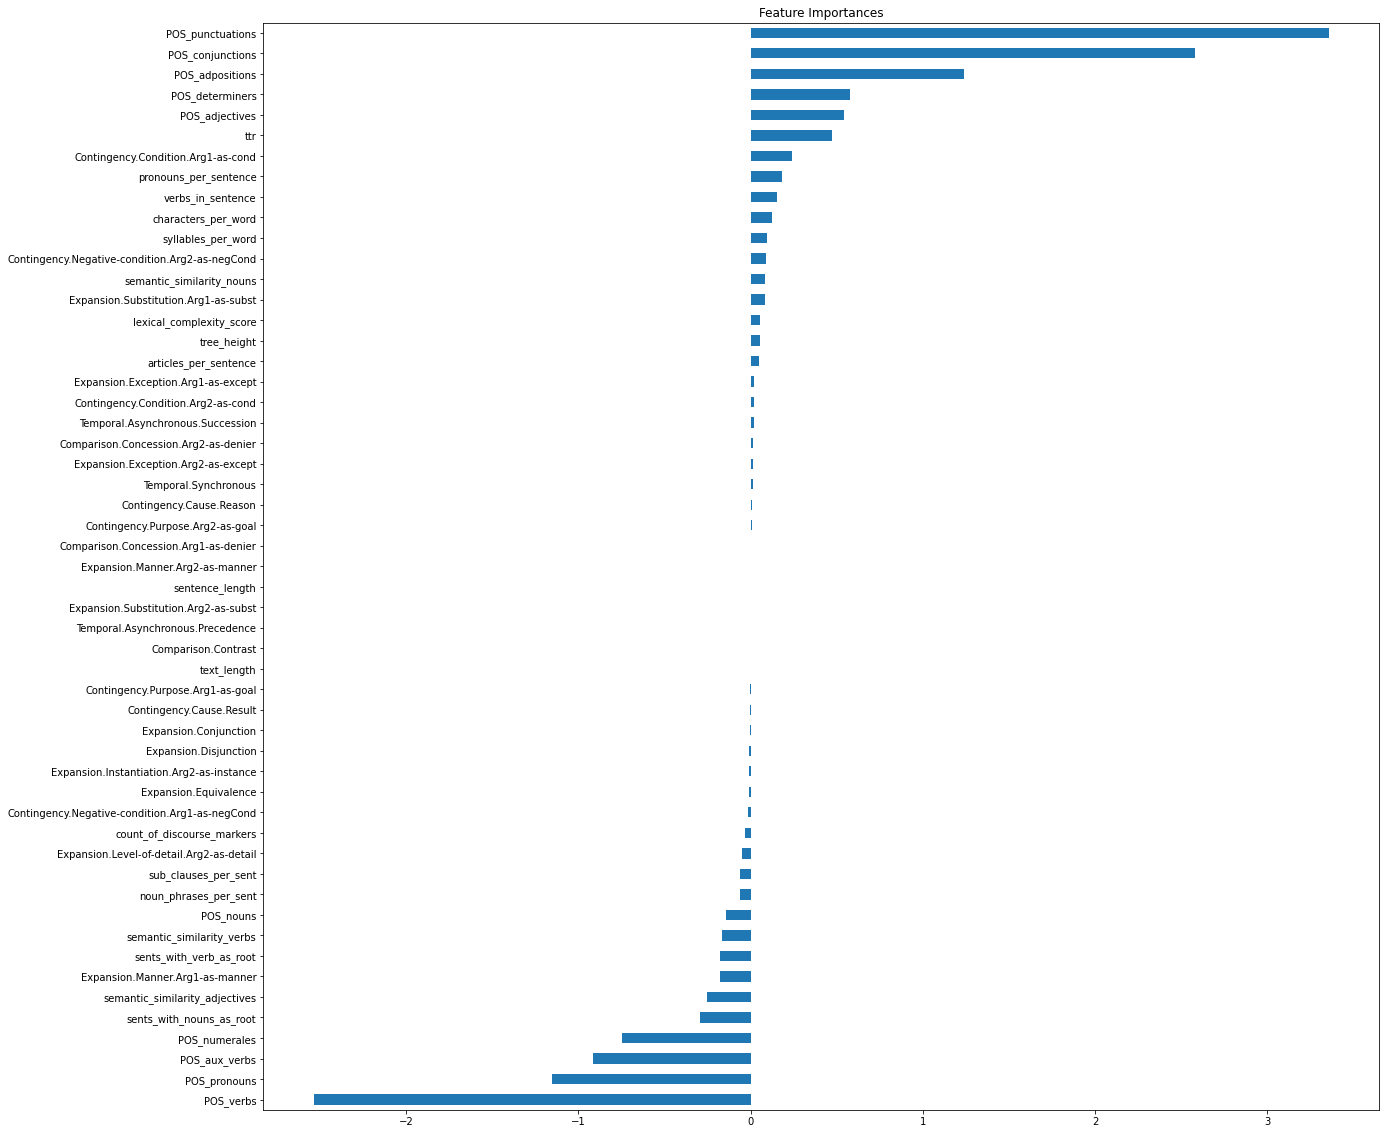

In [17]:
plt.figure(figsize=(20, 20)) 
plt.title('Feature Importances')
feat_importances.plot(kind='barh')

Einige der extrahierten Features aus dem Lexica-Korpus haben sogar eine negative Feature Importanz, was bedeutet, dass diese die Fehler des Modells vergrößern.  

In [18]:
positiv_feat_importances = feat_importances[21:]
#positiv_feat_importances.index.tolist()

In [19]:
feat_importances

POS_verbs                                        -2.533494
POS_pronouns                                     -1.155380
POS_aux_verbs                                    -0.917656
POS_numerales                                    -0.745151
sents_with_nouns_as_root                         -0.293585
semantic_similarity_adjectives                   -0.250106
Expansion.Manner.Arg1-as-manner                  -0.180129
sents_with_verb_as_root                          -0.179643
semantic_similarity_verbs                        -0.166415
POS_nouns                                        -0.143055
noun_phrases_per_sent                            -0.059065
sub_clauses_per_sent                             -0.059037
Expansion.Level-of-detail.Arg2-as-detail         -0.052531
count_of_discourse_markers                       -0.033838
Contingency.Negative-condition.Arg1-as-negCond   -0.015734
Expansion.Equivalence                            -0.009081
Expansion.Instantiation.Arg2-as-instance         -0.0088

In [20]:
positiv_feat_importances_df = lexica_corpus_df[['#label',
'Expansion.Manner.Arg2-as-manner',
 'Expansion.Substitution.Arg2-as-subst',
 'Comparison.Concession.Arg1-as-denier',
 'Expansion.Exception.Arg1-as-except',
 'Expansion.Exception.Arg2-as-except',
 'Comparison.Contrast',
 'Temporal.Asynchronous.Precedence',
 'Comparison.Concession.Arg2-as-denier',
 'semantic_similarity_nouns',
 'Contingency.Condition.Arg1-as-cond',
 'Contingency.Purpose.Arg2-as-goal',
 'Contingency.Cause.Reason',
 'Contingency.Negative-condition.Arg2-as-negCond',
 'sentence_length',
 'Temporal.Asynchronous.Succession',
 'Expansion.Substitution.Arg1-as-subst',
 'Contingency.Condition.Arg2-as-cond',
 'POS_adjectives',
 'POS_determiners',
 'Temporal.Synchronous',
 'syllables_per_word',
 'POS_adpositions',
 'lexical_complexity_score',
 'articles_per_sentence',
 'ttr',
 'POS_conjunctions',
 'pronouns_per_sentence',
 'tree_height',
 'text_length',
 'verbs_in_sentence',
 'characters_per_word',
 'POS_punctuations']]

In [21]:
positiv_feat_importances_df.head()

,#label,Expansion.Manner.Arg2-as-manner,Expansion.Substitution.Arg2-as-subst,Comparison.Concession.Arg1-as-denier,Expansion.Exception.Arg1-as-except,Expansion.Exception.Arg2-as-except,Comparison.Contrast,Temporal.Asynchronous.Precedence,Comparison.Concession.Arg2-as-denier,semantic_similarity_nouns,...,lexical_complexity_score,articles_per_sentence,ttr,POS_conjunctions,pronouns_per_sentence,tree_height,text_length,verbs_in_sentence,characters_per_word,POS_punctuations
0,0.0,0,0,0,0,0,2,1,0,0.164365,...,7.406711,0.142857,0.683168,0.049020,0.642857,3.857143,102,1.285714,4.862745,0.097345
1,0.0,0,0,0,0,0,0,0,0,0.207224,...,7.652426,1.454545,0.590909,0.011236,0.090909,4.363636,89,0.909091,4.494382,0.091837
2,0.0,0,0,0,0,0,0,0,0,0.257176,...,8.269501,1.312500,0.517544,0.017391,0.375000,3.500000,115,0.875000,4.521739,0.128788
3,0.0,0,0,0,0,0,0,6,0,0.249245,...,7.802380,0.600000,0.531469,0.020833,0.600000,3.850000,144,1.000000,5.000000,0.100000
4,0.0,0,0,0,0,0,2,0,0,0.161453,...,7.951559,0.647059,0.704762,0.009434,0.529412,3.470588,106,0.882353,5.132075,0.101695


In [22]:
y_positiv_feat_importances = positiv_feat_importances_df["#label"]
X_positiv_feat_importances = positiv_feat_importances_df.drop(["#label"],  axis='columns')

In [23]:
X_train_PFI, X_test_PFI, y_train_PFI, y_test_PFI = train_test_split(X_positiv_feat_importances, y_positiv_feat_importances, test_size=0.2, random_state=123)

print("X_train_PFI shape: ", X_train_PFI.shape)
print("X_test_PFI shape: ", X_test_PFI.shape)
print("y_train_PFI shape: ", y_train_PFI.shape)
print("y_test_PFI shape: ", y_test_PFI.shape)

X_train_PFI shape:  (708, 32)
X_test_PFI shape:  (177, 32)
y_train_PFI shape:  (708,)
y_test_PFI shape:  (177,)


In [24]:
model_PFI = LinearRegression()
model_PFI.fit(X_train_PFI , y_train_PFI)

LinearRegression()

In [25]:
scores_PFI = cross_val_score(model_PFI, X_positiv_feat_importances, y_positiv_feat_importances, cv=5, scoring='neg_mean_squared_error')

# durchschnittliche mittlere quadratische Abweichung
mse_mean_PFI = -scores_PFI.mean()
print("Mean squared error:", mse_mean_PFI)

Mean squared error: 0.038827300170337184


# Predict the textual complexity of the automatic generated summaries

In [26]:
summaries_df = pd.read_csv("text_complexity_model_summaries.csv", index_col=False).drop(["Unnamed: 0"], axis='columns') #.drop(["Expansion.Level-of-detail.Arg1-as-detail", "Expansion.Instantiation"],  axis='columns')

In [27]:
#summaries_df.to_csv("text_complexity_model_summaries.csv")

In [28]:
summaries_df.head()

,#id,sentence_length,characters_per_word,syllables_per_word,text_length,noun_phrases_per_sent,tree_height,sub_clauses_per_sent,sents_with_verb_as_root,sents_with_nouns_as_root,...,Temporal.Synchronous,Contingency.Purpose.Arg2-as-goal,Expansion.Exception.Arg1-as-except,Expansion.Level-of-detail.Arg2-as-detail,Expansion.Substitution.Arg1-as-subst,Contingency.Condition.Arg1-as-cond,Expansion.Instantiation.Arg2-as-instance,Contingency.Condition.Arg2-as-cond,Expansion.Equivalence,Expansion.Manner.Arg2-as-manner
0,summary_FFN_maz-10110,21.800000,5.825688,2.119266,109,5.600000,7.000000,1.000000,0.200000,0.0,...,0,0,0,0,0,0,0,1,1,1
1,summary_FFN_maz-10175,15.500000,7.000000,2.387097,31,4.500000,7.000000,0.500000,0.500000,0.0,...,2,0,0,0,0,0,0,0,0,0
2,summary_FFN_maz-10205,17.666667,5.820755,2.066038,106,5.500000,6.666667,1.000000,0.500000,0.0,...,1,1,0,0,0,0,0,0,0,0
3,summary_FFN_maz-10207,27.714286,5.690722,1.979381,194,8.428571,7.857143,1.428571,0.714286,0.0,...,2,5,0,0,0,0,0,1,0,0
4,summary_FFN_maz-10374,25.500000,5.303922,1.872549,102,6.500000,7.500000,0.500000,0.750000,0.0,...,3,2,0,0,0,0,0,0,1,0


In [29]:
summaries = summaries_df.drop(["#id"],  axis='columns')
summaries.describe()

,sentence_length,characters_per_word,syllables_per_word,text_length,noun_phrases_per_sent,tree_height,sub_clauses_per_sent,sents_with_verb_as_root,sents_with_nouns_as_root,POS_verbs,...,Temporal.Synchronous,Contingency.Purpose.Arg2-as-goal,Expansion.Exception.Arg1-as-except,Expansion.Level-of-detail.Arg2-as-detail,Expansion.Substitution.Arg1-as-subst,Contingency.Condition.Arg1-as-cond,Expansion.Instantiation.Arg2-as-instance,Contingency.Condition.Arg2-as-cond,Expansion.Equivalence,Expansion.Manner.Arg2-as-manner
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.0,166.000000,166.000000,166.0,166.000000,166.000000,166.000000,166.000000
mean,19.464876,5.830316,2.080962,86.481928,5.386666,6.655278,1.127008,0.370260,0.025550,0.147616,...,1.030120,1.512048,0.0,0.006024,0.030120,0.0,0.042169,0.259036,0.271084,0.024096
std,4.864737,0.446521,0.171405,36.039158,1.427222,1.063664,0.642181,0.266940,0.080729,0.035245,...,1.081103,1.301458,0.0,0.077615,0.203744,0.0,0.201582,0.491512,0.543843,0.153812
min,9.000000,4.500000,1.702128,9.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.046729,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,16.250000,5.538099,1.975250,57.250000,4.425000,6.000000,0.666667,0.166667,0.000000,0.127660,...,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,19.000000,5.783268,2.067741,93.000000,5.200000,6.690477,1.000000,0.375000,0.000000,0.144387,...,1.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,21.800000,6.126052,2.173118,109.000000,6.000000,7.300000,1.500000,0.500000,0.000000,0.164722,...,2.000000,2.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,34.000000,7.000000,2.500000,194.000000,11.200000,10.000000,4.200000,1.000000,0.500000,0.300000,...,4.000000,6.000000,0.0,1.000000,2.000000,0.0,1.000000,2.000000,4.000000,1.000000


# Model mit allen Features

In [30]:
summaries_text_complexity_predictions = model.predict(summaries)

In [33]:
summaries_text_complexity_predictions

array([1.0044568 , 0.73178592, 0.72896182, 1.00991321, 0.83819274,
       0.94955003, 0.68604263, 0.95272433, 1.29170691, 0.63947351,
       0.59696056, 1.17277592, 1.22034238, 0.89683081, 0.68334506,
       0.76289345, 0.93242468, 0.57690126, 0.68784019, 0.68812742,
       0.76203129, 1.21901692, 0.67970488, 0.8227023 , 0.31037426,
       0.8565385 , 0.78211247, 0.96999996, 0.85732144, 0.95042224,
       0.96858307, 0.97316461, 0.38345479, 0.68883753, 0.9164366 ,
       1.09520574, 1.20792317, 0.47951822, 0.61317474, 1.00446502,
       0.80763946, 0.59734054, 0.89597931, 0.49126974, 0.58696882,
       0.92795775, 0.94312094, 0.92721537, 0.83343244, 1.12193237,
       0.80989564, 0.94335809, 0.17991142, 1.14500742, 0.58914813,
       0.86077832, 0.70866861, 0.75347776, 0.74293596, 1.10296271,
       0.60028366, 0.80158072, 0.78183415, 0.67681683, 0.79053283,
       0.80566608, 0.61527148, 1.22723236, 0.89486456, 0.78798584,
       0.68133408, 0.71572679, 1.20357023, 0.67680907, 0.85741

In [32]:
summaries_text_complexity_predictions.mean()

0.8331321741061071